# **This is the main file to run code for the Summer 2025 SULI appointment**
#### *Coded by Brandon Swanson<br>Mentored by Bhupendra Raut*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import xarray as xr
import pandas as pd
from scipy.io import netcdf
import netCDF4 as nc
import os
from datetime import datetime, timedelta
import tempfile
import shutil
import gzip

## In Person Code

### Dataset modification

In [3]:
ds = xr.open_dataset('/home/bswanson/Desktop/Data/aqt/crocus_neiu_aqt_a1_20230520_000000.nc',engine='netcdf4')
ds

<xarray.Dataset> Size: 1MB
Dimensions:           (time: 1440)
Coordinates:
  * time              (time) datetime64[ns] 12kB 2023-05-20T00:00:56.74538725...
Data variables: (12/22)
    name              (time) <U18 104kB ...
    meta.description  (time) <U52 300kB ...
    meta.host         (time) <U26 150kB ...
    meta.missing      (time) <U7 40kB ...
    meta.node         (time) <U16 92kB ...
    meta.plugin       (time) <U56 323kB ...
    ...                ...
    no2               (time) float64 12kB ...
    co                (time) float64 12kB ...
    temperature       (time) float64 12kB ...
    humidity          (time) float64 12kB ...
    pressure          (time) float64 12kB ...
    dewpoint          (time) float64 12kB ...
Attributes:
    conventions:  CF 1.10
    site_ID:      NEIU
    CAMS_tag:     CMS-AQT-001
    datastream:   CMS_aqt580_NEIU_a1
    datalevel:    a1
    node:         W08D
    latitude:     41.9804526
    longitude:    -87.7196038

In [68]:
rdf = ds.isel('pm2.5','pm1.0','pm10.0','no','o3','no2','co','temperature')



TypeError: Dataset.isel() takes from 1 to 4 positional arguments but 9 were given

In [59]:
rdf= []
# rdf = ds[]
# print(rdf)
for i in ds:
    # rdf = ds[i != 'pm2.5','pm1.0','pm10.0','no','o3','no2','co','temperature']
    rdf = ds[(i != 'name')]

KeyError: "No variable named False. Variables on the dataset include ['time', 'name', 'meta.description', 'meta.host', 'meta.missing', ..., 'co', 'temperature', 'humidity', 'pressure', 'dewpoint']"

In [69]:


for i in ds:
    print(f"{ds[i]}")

<xarray.DataArray 'name' (time: 1440)> Size: 104kB
array(['aqt.particle.pm2.5', 'aqt.particle.pm2.5', 'aqt.particle.pm2.5', ...,
       'aqt.particle.pm2.5', 'aqt.particle.pm2.5', 'aqt.particle.pm2.5'],
      shape=(1440,), dtype='<U18')
Coordinates:
  * time     (time) datetime64[ns] 12kB 2023-05-20T00:00:56.745387258 ... 202...
<xarray.DataArray 'meta.description' (time: 1440)> Size: 300kB
array(['Particulate Matter less than 2.5 microns in diameter',
       'Particulate Matter less than 2.5 microns in diameter',
       'Particulate Matter less than 2.5 microns in diameter', ...,
       'Particulate Matter less than 2.5 microns in diameter',
       'Particulate Matter less than 2.5 microns in diameter',
       'Particulate Matter less than 2.5 microns in diameter'],
      shape=(1440,), dtype='<U52')
Coordinates:
  * time     (time) datetime64[ns] 12kB 2023-05-20T00:00:56.745387258 ... 202...
<xarray.DataArray 'meta.host' (time: 1440)> Size: 150kB
array(['000048b02d3ae277.ws-nxcore',

In [24]:
ds['temperature'].units

'celsius'

In [3]:
dr = xr.open_dataset('/home/bswanson/Desktop/Data/wxt/crocus_neiu_wxt_a1_20230516_000000.nc',engine='netcdf4')
dr

<xarray.Dataset> Size: 72kB
Dimensions:        (time: 899)
Coordinates:
  * time           (time) datetime64[ns] 7kB 2023-05-16T21:30:10 ... 2023-05-...
Data variables:
    temperature    (time) float64 7kB ...
    humidity       (time) float64 7kB ...
    pressure       (time) float64 7kB ...
    rainfall       (time) float64 7kB ...
    dewpoint       (time) float64 7kB ...
    wetbulb        (time) float64 7kB ...
    wind_dir_10s   (time) float64 7kB ...
    wind_mean_10s  (time) float64 7kB ...
    wind_max_10s   (time) float64 7kB ...
Attributes:
    conventions:  CF 1.10
    site_ID:      NEIU
    node:         W08D
    CAMS_tag:     CMS-WXT-002
    datastream:   CMS_wxt536_NEIU_a1
    datalevel:    a1
    latitude:     41.9804526
    longitude:    -87.7196038

In [1]:
import netCDF4
import os
import glob

def append_units_to_variables(nc_file_path, variable_units):
    """Append units to specified variables in a NetCDF file."""
    try:
        # Open the NetCDF file for reading and writing
        with netCDF4.Dataset(nc_file_path, 'r+') as nc_file:
            for variable_name, units in variable_units.items():
                if variable_name in nc_file.variables:
                    # Append units attribute to the variable
                    nc_file.variables[variable_name].setncattr('units', units)
                    print(f"Set units for '{variable_name}' to '{units}' in file '{nc_file_path}'")
                else:
                    print(f"Variable '{variable_name}' not found in file '{nc_file_path}'.")
    except OSError as e:
        print(f"Error opening file '{nc_file_path}': {e}")

def main():
    # Prompt user for the directory containing NetCDF files
    directory_path = input("Enter the directory path containing NetCDF files: ")

    # Prompt user for the file pattern (e.g., '*.nc')
    file_pattern = input("Enter the file pattern (e.g., '*.nc'): ")

    # Construct the full pattern for glob
    full_pattern = os.path.join(directory_path, file_pattern)

    # Find all files matching the pattern
    nc_files = glob.glob(full_pattern)

    if not nc_files:
        print("No files found matching the pattern.")
        return

    # Prompt user for variable names and units
    variable_units = {}
    while True:
        variable_name = input("Enter the variable name (or 'done' to finish): ")
        if variable_name.lower() == 'done':
            break
        units = input(f"Enter the units for '{variable_name}': ")
        variable_units[variable_name] = units

    # Append units to variables in each NetCDF file
    for nc_file_path in nc_files:
        append_units_to_variables(nc_file_path, variable_units)

if __name__ == "__main__":
    main()

Enter the directory path containing NetCDF files:  /home/bswanson/Desktop/Data/wxt
Enter the file pattern (e.g., '*.nc'):  *.nc
Enter the variable name (or 'done' to finish):  temperature
Enter the units for 'temperature':  celcius
Enter the variable name (or 'done' to finish):  humidity
Enter the units for 'humidity':  %
Enter the variable name (or 'done' to finish):  pressure
Enter the units for 'pressure':  hPa
Enter the variable name (or 'done' to finish):  rainfall
Enter the units for 'rainfall':  mm/hr
Enter the variable name (or 'done' to finish):  dewpoint
Enter the units for 'dewpoint':  celcius
Enter the variable name (or 'done' to finish):  wetbulb
Enter the units for 'wetbulb':  celcius
Enter the variable name (or 'done' to finish):  wind_dir_10s
Enter the units for 'wind_dir_10s':  °
Enter the variable name (or 'done' to finish):  wind_mean_10s
Enter the units for 'wind_mean_10s':  m/s
Enter the variable name (or 'done' to finish):  wind_max_10s
Enter the units for 'wind_m

Set units for 'temperature' to 'celcius' in file '/home/bswanson/Desktop/Data/wxt/crocus_neiu_wxt_a1_20230830_000000.nc'
Set units for 'humidity' to '%' in file '/home/bswanson/Desktop/Data/wxt/crocus_neiu_wxt_a1_20230830_000000.nc'
Set units for 'pressure' to 'hPa' in file '/home/bswanson/Desktop/Data/wxt/crocus_neiu_wxt_a1_20230830_000000.nc'
Set units for 'rainfall' to 'mm/hr' in file '/home/bswanson/Desktop/Data/wxt/crocus_neiu_wxt_a1_20230830_000000.nc'
Set units for 'dewpoint' to 'celcius' in file '/home/bswanson/Desktop/Data/wxt/crocus_neiu_wxt_a1_20230830_000000.nc'
Set units for 'wetbulb' to 'celcius' in file '/home/bswanson/Desktop/Data/wxt/crocus_neiu_wxt_a1_20230830_000000.nc'
Set units for 'wind_dir_10s' to '°' in file '/home/bswanson/Desktop/Data/wxt/crocus_neiu_wxt_a1_20230830_000000.nc'
Set units for 'wind_mean_10s' to 'm/s' in file '/home/bswanson/Desktop/Data/wxt/crocus_neiu_wxt_a1_20230830_000000.nc'
Set units for 'wind_max_10s' to 'm/s' in file '/home/bswanson/Deskt

In [4]:
dr['wind_max_10s'].units

'm/s'

In [5]:
dr['wind_mean_10s'].units

'm/s'

In [5]:
test = xr.open_dataset('/home/bswanson/Desktop/Data/wxt/crocus_neiu_wxt_a1_20230801_000000.nc',engine='netcdf4')
test

<xarray.Dataset> Size: 643kB
Dimensions:        (time: 8040)
Coordinates:
  * time           (time) datetime64[ns] 64kB 2023-08-01T01:40:00 ... 2023-08...
Data variables:
    temperature    (time) float64 64kB ...
    humidity       (time) float64 64kB ...
    pressure       (time) float64 64kB ...
    rainfall       (time) float64 64kB ...
    dewpoint       (time) float64 64kB ...
    wetbulb        (time) float64 64kB ...
    wind_dir_10s   (time) float64 64kB ...
    wind_mean_10s  (time) float64 64kB ...
    wind_max_10s   (time) float64 64kB ...
Attributes:
    conventions:  CF 1.10
    site_ID:      NEIU
    node:         W08D
    CAMS_tag:     CMS-WXT-002
    datastream:   CMS_wxt536_NEIU_a1
    datalevel:    a1
    latitude:     41.9804526
    longitude:    -87.7196038

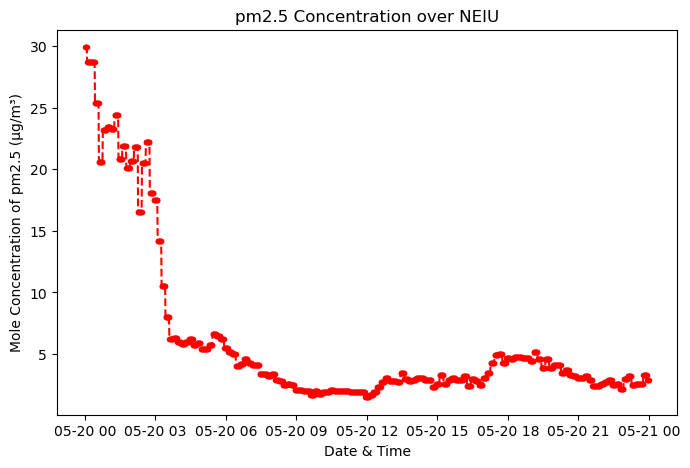

In [17]:
x = ds["pm2.5"]

y = ds["time"]
# figure
fig,ax = plt.subplots(1,1, figsize=(8, 5))
ax.plot(y,x, marker = '.', c='red', ls='--')
ax.set(xlabel = 'Date & Time', ylabel = 'Mole Concentration of pm2.5 (µg/m³)')
plt.title("pm2.5 Concentration over NEIU")
plt.show()

# **CORE PROGRAM**

#### broken code

In [9]:
##########

# THIS ONE IS BROKEN

##########
# def parse_datetime(filepath):
    
# def parse_netcdf(dp, typ, tf):
def parse_netcdf(file_paths, typ, tf, output_dir):
    # ds = xr.open_dataset(dp, engine='netcdf4')
    # var = ds[typ]
    # vtime = ds['time']
    # av = var/tf
    # print(av)
    time_frame_minutes = int(tf.split()[0])
    time_frame_delta = timedelta(minutes=time_frame_minutes)
    
    # Initialize an empty list to store datasets
    datasets = []

    # Open each netCDF file and extract the specified variable
    for file_path in file_paths:
        ds = xr.open_dataset(file_path, engine='netcdf4')
        var = ds[typ]
        datasets.append(var)

    # Concatenate all datasets along the time dimension
    combined_data = xr.concat(datasets, dim='time')

    # Resample the data to the specified time frame and calculate the mean
    averaged_data = combined_data.resample(time=f'{time_frame_minutes}T').mean()

    # Construct the output file name
    base_name = os.path.basename(file_path)
    name_parts = base_name.split('_')
    date_time = name_parts[-2] + '_' + name_parts[-1].split('.')[0]
    new_file_name = f"{'_'.join(name_parts[:-2])}_{date_time}_{time_frame_minutes}min.nc"

    # Define the output file path
    output_file_path = os.path.join(output_dir, new_file_name)
    
    # print(averaged_data)
    # Save the averaged data to a new netCDF file
    averaged_data.to_netcdf(output_file_path)
    print(f"Averaged data saved to {output_file_path}")

# Open files
def main():
    dp = input("Input the netCDF directory path: ").strip()
    typ = input("What PM or Gas type (i.e. pm2.5): ").strip()
    tf = input("What time frame to average (1 minute, 2 minute, 5 minute, etc.): ").strip()
    
    file_paths = glob(os.path.join(dp, '*.nc'))

    # Check if any files were found
    if not file_paths:
        print("No netCDF files found in the specified directory.")
        return
        
    output_dir = input("Input new netCDF file location: ").strip()
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Process each netCDF file individually
    for file_path in file_paths:
        parse_netcdf(file_path, typ, tf, output_dir)
    # parse_netcdf(file_paths, typ, tf, output_file_path)

if __name__ == "__main__":
    main()

Input the netCDF directory path:  /home/bswanson/Desktop/Data/aqt
What PM or Gas type (i.e. pm2.5):  pm2.5
What time frame to average (1 minute, 2 minute, 5 minute, etc.):  30
Input new netCDF file location:  /home/bswanson/Desktop/Data/aqt_new


OSError: [Errno -51] NetCDF: Unknown file format: '/'

#### Working code

In [6]:
testing = xr.open_dataset('/home/bswanson/Desktop/Data/export/test.nc',engine='netcdf4')
testing

<xarray.Dataset> Size: 81kB
Dimensions:  (time: 5040)
Coordinates:
  * time     (time) datetime64[ns] 40kB 2023-05-20 ... 2023-09-01T23:30:00
Data variables:
    pm2.5    (time) float64 40kB ...

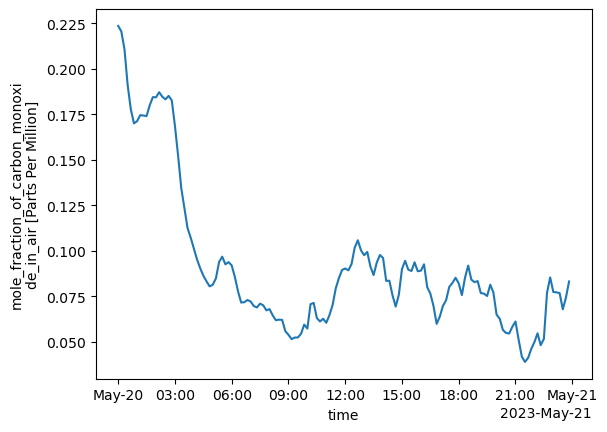

In [28]:
test = xr.open_dataset('/home/bswanson/Desktop/Data/aqt_new/co/10min/crocus_neiu_aqt_a1_20230520_000000_co_10min.nc',engine='netcdf4')
test['co'].plot()

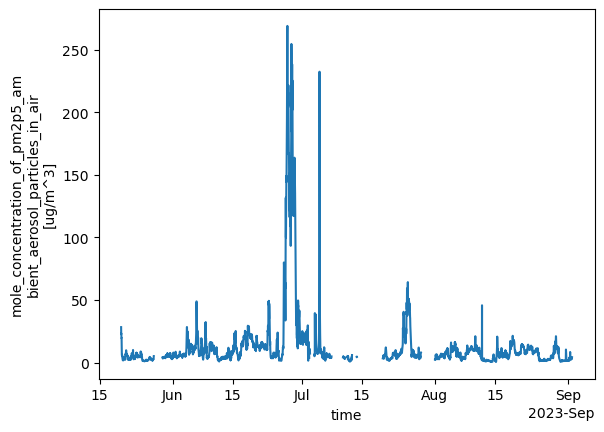

In [33]:
test = xr.open_dataset('/home/bswanson/Desktop/Data/export/test.nc',engine='netcdf4')
test['pm2.5'].plot()

#### Old core program

In [21]:
# Core Program

def parse_netcdf(file_path, variable_type, time_frame, output_dir):
    # Convert the time frame to a timedelta object
    time_frame_minutes = int(time_frame.split()[0])
    
    # Open the netCDF file and extract the specified variable
    ds = xr.open_dataset(file_path, engine='netcdf4')
    var = ds[variable_type]

    # Resample the data to the specified time frame and calculate the mean
    averaged_data = var.resample(time=f'{time_frame_minutes}T').mean()

    # Construct the output file name
    base_name = os.path.basename(file_path)
    name_parts = base_name.split('_')
    date_time = name_parts[-2] + '_' + name_parts[-1].split('.')[0]
    new_file_name = f"{'_'.join(name_parts[:-2])}_{date_time}_{variable_type}_{time_frame_minutes}min.nc"

    # Define the output file path
    output_file_path = os.path.join(output_dir, new_file_name)

    # Save the averaged data to a new netCDF file
    averaged_data.to_netcdf(output_file_path)
    print(f"Averaged data saved to {output_file_path}")

def main():
    # Input the directory containing netCDF files
    directory_path = input("Input the directory path containing netCDF files: ").strip()
    # Input the variable type (e.g., pm2.5)
    variable_type = input("What PM or Gas type (i.e. pm2.5): ").strip()
    # Input the time frame for averaging
    time_frame = input("What time frame to average (e.g., 1 minute, 2 minute, 5 minute): ").strip()
    # Input the output directory for the averaged data
    output_dir = input("Input the output directory for the new netCDF files: ").strip()

    # Use glob to find all netCDF files in the specified directory
    file_paths = glob(os.path.join(directory_path, '*.nc'))

    # Check if any files were found
    if not file_paths:
        print("No netCDF files found in the specified directory.")
        return

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Process each netCDF file individually
    for file_path in file_paths:
        parse_netcdf(file_path, variable_type, time_frame, output_dir)

if __name__ == "__main__":
    main()

Input the directory path containing netCDF files:  /home/bswanson/Desktop/Data/aqt
What PM or Gas type (i.e. pm2.5):  no
What time frame to average (e.g., 1 minute, 2 minute, 5 minute):  10
Input the output directory for the new netCDF files:  /home/bswanson/Desktop/Data/aqt_new/no


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230520_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230521_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230522_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230523_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230524_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230525_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230526_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230527_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230529_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230530_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230531_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230601_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230602_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230603_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230604_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230605_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230606_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230607_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230608_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230609_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230610_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230611_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230612_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230613_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230614_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230615_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230616_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230617_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230618_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230619_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230620_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230621_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230622_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230623_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230624_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230625_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230626_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230627_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230628_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230629_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230630_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230701_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230702_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230704_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230705_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230706_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230707_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230710_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230711_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230712_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230713_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230719_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230720_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230721_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230722_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230723_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230724_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230725_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230726_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230727_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230728_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230801_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230802_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230803_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230804_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230805_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230806_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230807_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230808_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230809_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230810_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230811_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230812_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230813_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230814_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230815_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230816_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230817_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230818_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230819_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230820_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230821_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230822_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230823_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230824_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230825_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230826_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230827_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230828_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230829_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230830_000000_no_10min.nc
Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230831_000000_no_10min.nc


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(
/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Averaged data saved to /home/bswanson/Desktop/Data/aqt_new/no/crocus_neiu_aqt_a1_20230901_000000_no_10min.nc


#### New core program

Input the directory path containing netCDF files:  /home/bswanson/Desktop/Data/aqt_wxt
What time frame to average (e.g., 1 minute, 2 minute, 5 minute):  15
Input the output directory for the new netCDF file:  /home/bswanson/Desktop/Data


/home/bswanson/miniforge3/envs/my_project/lib/python3.13/site-packages/xarray/groupers.py:498: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  self.index_grouper = pd.Grouper(


Resampled data saved to /home/bswanson/Desktop/Data/crocus_neiu_a1_merged_15min.nc


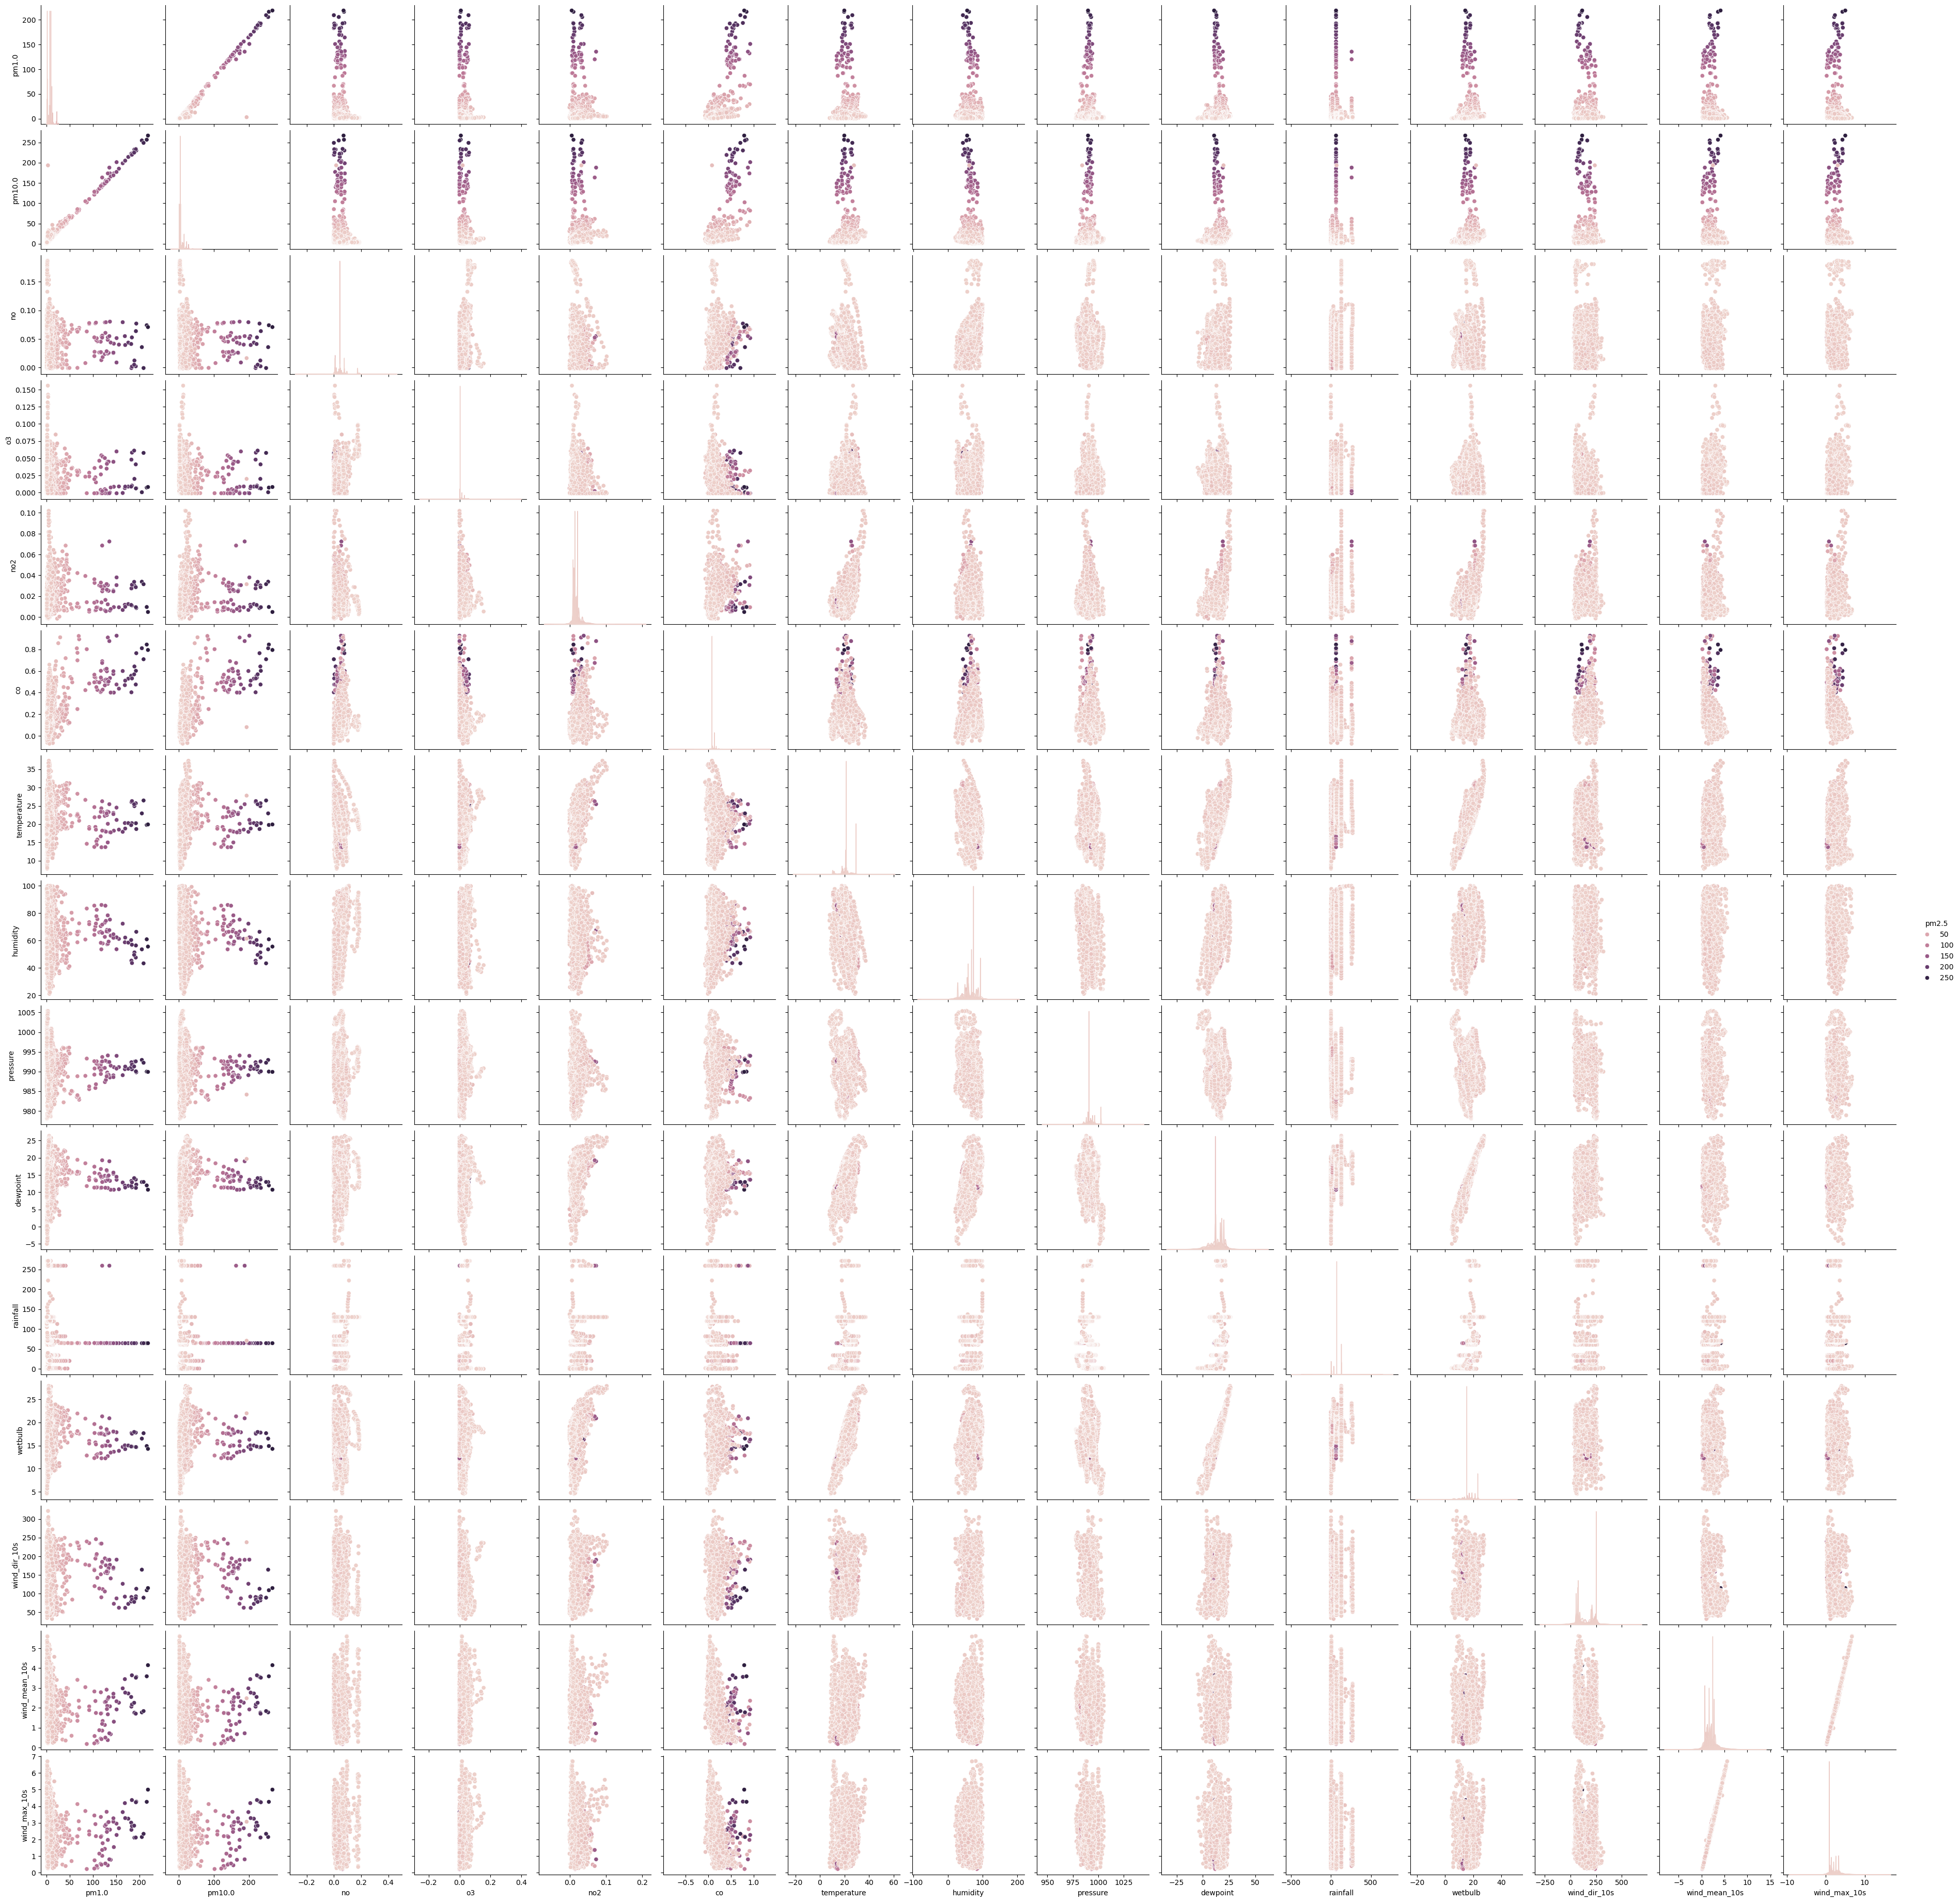

In [4]:
import os
from glob import glob
import xarray as xr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def merge_netcdf(file_paths, time_frame, output_dir):
    # Convert the time frame to a timedelta object
    time_frame_minutes = int(time_frame.split()[0])
    
    # Initialize an empty list to store datasets
    datasets = []

    # Open each netCDF file and append to the list
    for file_path in file_paths:
        ds = xr.open_dataset(file_path, engine='netcdf4')
        datasets.append(ds)

    # Concatenate all datasets along the time dimension
    combined_data = xr.concat(datasets, dim='time')

    # Resample the data to the specified time frame
    resampled_data = combined_data.resample(time=f'{time_frame_minutes}T').mean()

    # Construct the output file name
    new_file_name = f"crocus_neiu_a1_merged_{time_frame_minutes}min.nc"
    output_file_path = os.path.join(output_dir, new_file_name)

    # Save the resampled data to a new netCDF file
    resampled_data.to_netcdf(output_file_path)
    print(f"Resampled data saved to {output_file_path}")

    return resampled_data

def plot_variable_pairs(dataset, time_frame):
    # Convert the xarray dataset to a pandas DataFrame
    df = dataset.to_dataframe().reset_index()

    # Use seaborn to plot pairwise relationships
    
    sns.pairplot(df, hue='pm2.5')
    plt.savefig(fname=f'CROCUS_NEIU_MERGED_PAIRPLOT_{time_frame}MIN.png')
    plt.show()

def main():
    # Input the directory containing netCDF files
    directory_path = input("Input the directory path containing netCDF files: ").strip()
    # Input the time frame for averaging
    time_frame = input("What time frame to average (e.g., 1 minute, 2 minute, 5 minute): ").strip()
    # Input the output directory for the new netCDF file
    output_dir = input("Input the output directory for the new netCDF file: ").strip()

    # Use glob to find all netCDF files in the specified directory
    file_paths = glob(os.path.join(directory_path, '*.nc'))

    # Check if any files were found
    if not file_paths:
        print("No netCDF files found in the specified directory.")
        return

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Merge netCDF files based on the specified time frame and save the result
    merged_data = merge_netcdf(file_paths, time_frame, output_dir)

    # Plot pairwise relationships between variables
    plot_variable_pairs(merged_data, time_frame)

if __name__ == "__main__":
    main()

In [2]:
import os
from glob import glob
import xarray as xr
import numpy as np

def merge_netcdf(dir1, dir2, time_frame, output_dir):
    # Convert the time frame to a timedelta object
    time_frame_minutes = int(time_frame.split()[0])
    
    # Gather all netCDF files from both directories
    file_paths = glob(os.path.join(dir1, '*.nc')) + glob(os.path.join(dir2, '*.nc'))

    # Check if any files were found
    if not file_paths:
        print("No netCDF files found in the specified directories.")
        return

    # Initialize an empty list to store datasets
    datasets = []

    # Open each netCDF file and append to the list
    for file_path in file_paths:
        ds = xr.open_dataset(file_path, engine='netcdf4')
        
        # Normalize time to the nearest lower minute
        ds['time'] = ds['time'].dt.floor('min')
        
        # Append the dataset to the list
        datasets.append(ds)

    # Concatenate all datasets along the time dimension
    combined_data = xr.concat(datasets, dim='time', combine_attrs='override')

    # Handle duplicate variable names
    var_names = list(combined_data.data_vars)
    for var in var_names:
        if var_names.count(var) > 1:
            for i, ds in enumerate(datasets):
                if var in ds:
                    ds = ds.rename({var: f"{var}{i+1}"})
                    datasets[i] = ds

    # Re-concatenate datasets with renamed variables
    combined_data = xr.concat(datasets, dim='time', combine_attrs='override')
    
    # Sort by time to ensure monotonic index
    combined_data = combined_data.sortby('time')

    # Resample the data to the specified time frame
    resampled_data = combined_data.resample(time=f'{time_frame_minutes}min').mean()

    # Construct the output file name
    new_file_name = f"merged_data_{time_frame_minutes}min.nc"
    output_file_path = os.path.join(output_dir, new_file_name)

    # Save the resampled data to a new netCDF file
    resampled_data.to_netcdf(output_file_path)
    print(f"Resampled data saved to {output_file_path}")

    return resampled_data

def main():
    # Input the directories containing netCDF files
    dir1 = input("Input the first directory path containing netCDF files: ").strip()
    dir2 = input("Input the second directory path containing netCDF files: ").strip()
    # Input the time frame for averaging
    time_frame = input("What time frame to average (e.g., 1 minute, 2 minute, 5 minute): ").strip()
    # Input the output directory for the new netCDF file
    output_dir = input("Input the output directory for the new netCDF file: ").strip()

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Merge netCDF files based on the specified time frame and save the result
    merge_netcdf(dir1, dir2, time_frame, output_dir)

if __name__ == "__main__":
    main()

Input the first directory path containing netCDF files:  /home/bswanson/Desktop/Data/aqt
Input the second directory path containing netCDF files:  /home/bswanson/Desktop/Data/wxt
What time frame to average (e.g., 1 minute, 2 minute, 5 minute):  60
Input the output directory for the new netCDF file:  /home/bswanson/Desktop/Data/aqt_wxt


Resampled data saved to /home/bswanson/Desktop/Data/aqt_wxt/merged_data_60min.nc


##### Testing code

In [8]:
test = xr.open_dataset('/home/bswanson/Desktop/Data/aqt_wxt/crocus_neiu_a1_merged_60min.nc', engine='netcdf4')
test

<xarray.Dataset> Size: 339kB
Dimensions:        (time: 2496)
Coordinates:
  * time           (time) datetime64[ns] 20kB 2023-05-20 ... 2023-08-31T23:00:00
Data variables: (12/16)
    pm2.5          (time) float64 20kB ...
    pm1.0          (time) float64 20kB ...
    pm10.0         (time) float64 20kB ...
    no             (time) float64 20kB ...
    o3             (time) float64 20kB ...
    no2            (time) float64 20kB ...
    ...             ...
    dewpoint       (time) float64 20kB ...
    rainfall       (time) float64 20kB ...
    wetbulb        (time) float64 20kB ...
    wind_dir_10s   (time) float64 20kB ...
    wind_mean_10s  (time) float64 20kB ...
    wind_max_10s   (time) float64 20kB ...
Attributes:
    conventions:  CF 1.10
    site_ID:      NEIU
    CAMS_tag:     CMS-AQT-001
    datastream:   CMS_aqt580_NEIU_a1
    datalevel:    a1
    node:         W08D
    latitude:     41.9804526
    longitude:    -87.7196038

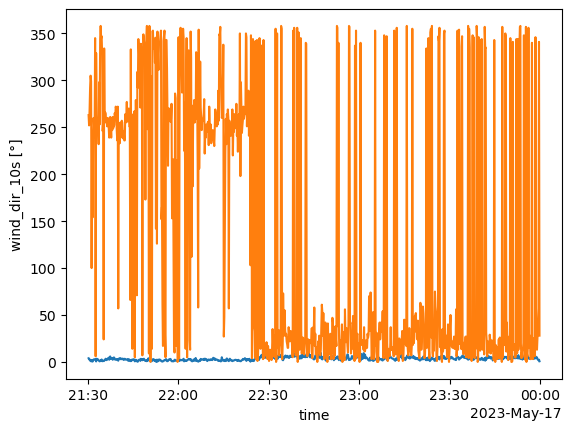

In [9]:
test = xr.open_dataset('/home/bswanson/Desktop/Data/wxt/crocus_neiu_wxt_a1_20230516_000000.nc' ,engine='netcdf4')
test['rainfall'].units
test['wind_mean_10s'].plot()
test['wind_dir_10s'].plot()

In [22]:
def resample_rainfall_where_temp_above_5(ds):
    """
    Given an xarray.Dataset (or DataArray) with:
      - coords:   "time" (dtype datetime64[ns])
      - data_vars:
         * "rainfall"    : running (cumulative) rainfall [mm]
         * "temperature" : temperature [°C]

    This returns an xarray.DataArray called "hourly_rainfall" that is
    indexed by hourly timestamps.  For each hour, it computes:
        last(rainfall[T≥5])  -  first(rainfall[T≥5])
    i.e. only sub-hourly samples where temperature ≥ 5°C are used to define
    the "first" and "last" in that hour.  If there are zero valid samples
    (all T<5 in that hour), that hour's accumulation is set to 0.0.

    Returns
    -------
    hourly_rain : xarray.DataArray
        Dimensions: (time=Number_of_hours)
        Values:   hourly accumulation in mm (float64)
        Where time is the left‐edge of each 1-hour bin (e.g. 2025-06-05T00:00, 01:00, …).
    """
    # 1) Mask rainfall to only keep times where T >= 5.0
    # ---------------------------------------------------
    # If T < 5, set rainfall to NaN so that .first() / .last() ignore those points.
    rain_masked = ds["rainfall"].where(ds["temperature"] >= 5.0)

    # 2) Resample masked rainfall to 1-hour bins
    #    Compute first‐and‐last in each hour
    # ---------------------------------------------------
    # .resample(time="1H").first() gives the first non‐NaN rainfall in that hour,
    # (or NaN if none).  Similarly for .last().
    first_in_hour = rain_masked.resample(time="1H").first()
    last_in_hour  = rain_masked.resample(time="1H").last()

    # 3) Compute accumulation = last - first
    # ---------------------------------------------------
    hourly_accum = last_in_hour - first_in_hour

    # 4) Where no valid points in that hour, both first & last are NaN → result NaN.
    #    Replace those NaNs with 0.0 (since "no rainfall counted when T<5 throughout")
    hourly_accum = hourly_accum.fillna(0.0)

    # 5) Rename the DataArray & attach a simple attribute
    hourly_accum.name = "hourly_rainfall_>=5C"
    hourly_accum.attrs["long_name"] = "Hourly rainfall where T >= 5 C"
    hourly_accum.attrs["units"] = "mm"

    return hourly_accum
hourly_rain = resample_rainfall_where_temp_above_5(ds_wxt)

# (D) Look at the output:
print(hourly_rain)
# xarray.DataArray 'hourly_rainfall_>=5C' (time: N_hours)
#   array([..., ..., ...], dtype=float64)
# Coordinates:
#   * time     (time) datetime64[ns] 2025-06-05T00:00:00 ... 2025-06-06T23:00:00

# (E) If you want a Pandas DataFrame:
df_wxt_hourly = hourly_rain.to_dataframe().reset_index()
print(df_wxt_hourly.head())

NameError: name 'ds_wxt' is not defined

### Work From Home Code